<a href="https://colab.research.google.com/github/robbi621/pembelajaran-mesin/blob/main/CNN%20%26%20ANN%20Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!wget -O flower_color_images.zip https://github.com/robbi621/pembelajaran-mesin/blob/main/flower_color_images.zip?raw=true



--2022-01-17 04:49:03--  https://github.com/robbi621/pembelajaran-mesin/blob/main/flower_color_images.zip?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/robbi621/pembelajaran-mesin/raw/main/flower_color_images.zip [following]
--2022-01-17 04:49:04--  https://github.com/robbi621/pembelajaran-mesin/raw/main/flower_color_images.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/robbi621/pembelajaran-mesin/main/flower_color_images.zip [following]
--2022-01-17 04:49:04--  https://raw.githubusercontent.com/robbi621/pembelajaran-mesin/main/flower_color_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserconte

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from PIL import Image

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

np.random.seed(42)

In [3]:
import zipfile, os

local_zip = '/content/flower_color_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Dataset2')
zip_ref.close()

In [4]:
pip install split-folders


In [5]:
import splitfolders

splitfolders.ratio('/content/Dataset2/flower_color_images', output="Dataset2_split", seed=42, ratio=(.80, .19, .01), group_prefix=None)

Copying files: 814 files [00:00, 5240.45 files/s]


In [6]:
# Definisikan path untuk data train dan data validation

base_dir = 'Dataset2_split'


test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')

test_flowers_dir = os.path.join(test_dir, 'flowers')
test_flower_image_dir = os.path.join(test_dir, 'flower_image')

train_flowers_dir = os.path.join(train_dir, 'flowers')
train_flower_image_dir = os.path.join(train_dir, 'flower_image')

In [7]:
import cv2
import numpy as np

# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [8]:
# Gather data validation
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

<h3>Data Preprocessing</h3>

In [9]:
# Tampilkan shape dari data train dan data validation
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)

Test Data =  (10, 150, 150, 3)
Test Label =  (10,)
Train Data =  (649, 150, 150, 3)
Train Label =  (649,)


In [10]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [ 31 139 244]
Data setelah di-normalisasi  [0.12156863 0.54509807 0.95686275]


In [11]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", test_label[100:110])

lb = LabelEncoder()
y_test = lb.fit_transform(test_label)
y_train = lb.fit_transform(train_label)

print("Label setelah di-encoder ", y_test[100:110])

Label sebelum di-encoder  []
Label setelah di-encoder  []


<h3>Definisikan Model CNN</h3>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [13]:
# building a linear stack of layers with the sequential model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(x_train.shape[1:])))
model.add(Activation("relu"))
model.add(MaxPool2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(2, 2, padding="same"))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="softmax"))

# compiling the sequential model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                        

In [14]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                        

In [16]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [17]:
# training the model for 10 epochs
history = model.fit(x_train, y_train, batch_size = 20, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
33/33 [==============================] - 33s 970ms/step - loss: 0.6152 - acc: 0.7427 - val_loss: 0.6139 - val_acc: 0.7000
Epoch 2/100
33/33 [==============================] - 32s 975ms/step - loss: 0.5756 - acc: 0.7427 - val_loss: 0.6121 - val_acc: 0.7000
Epoch 3/100
33/33 [==============================] - 32s 972ms/step - loss: 0.5712 - acc: 0.7427 - val_loss: 0.6156 - val_acc: 0.7000
Epoch 4/100
33/33 [==============================] - 32s 958ms/step - loss: 0.5705 - acc: 0.7427 - val_loss: 0.6151 - val_acc: 0.7000
Epoch 5/100
33/33 [==============================] - 32s 969ms/step - loss: 0.5706 - acc: 0.7427 - val_loss: 0.6149 - val_acc: 0.7000
Epoch 6/100
33/33 [==============================] - 32s 964ms/step - loss: 0.5707 - acc: 0.7427 - val_loss: 0.6149 - val_acc: 0.7000
Epoch 7/100
33/33 [==============================] - 32s 970ms/step - loss: 0.5705 - acc: 0.7427 - val_loss: 0.6165 - val_acc: 0.7000
Epoch 8/100
33/33 [==============================] - 32s 960ms

<h3>Evaluasi Model</h3>

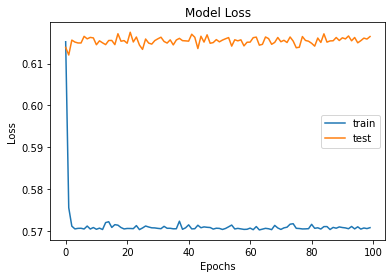

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

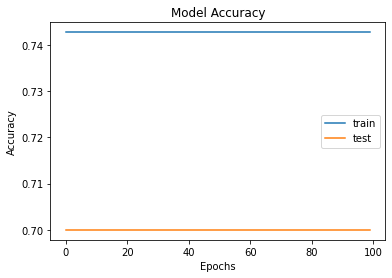

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [22]:
from sklearn.metrics import classification_report

pred = model.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       167
           1       0.74      1.00      0.85       482

    accuracy                           0.74       649
   macro avg       0.37      0.50      0.43       649
weighted avg       0.55      0.74      0.63       649



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from keras.models import save_model
model = save_model(model,'CnnMl.h5')

MODEL CNN


In [24]:


from tensorflow.keras import layers
from tensorflow.keras import Model

# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(64, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

# Tampilkan model summary
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_5 (Dense)             (None, 64)                4320064   
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,320,129
Trainable params: 4,320,129
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
H = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test ))

Epoch 1/100
33/33 [==============================] - 2s 33ms/step - loss: 6.5901 - acc: 0.6379 - val_loss: 2.8921 - val_acc: 0.3000
Epoch 2/100
33/33 [==============================] - 1s 28ms/step - loss: 1.2562 - acc: 0.6672 - val_loss: 1.3243 - val_acc: 0.1000
Epoch 3/100
33/33 [==============================] - 1s 28ms/step - loss: 1.0305 - acc: 0.6718 - val_loss: 1.2225 - val_acc: 0.6000
Epoch 4/100
33/33 [==============================] - 1s 29ms/step - loss: 1.5469 - acc: 0.6410 - val_loss: 3.7367 - val_acc: 0.7000
Epoch 5/100
33/33 [==============================] - 1s 27ms/step - loss: 1.1930 - acc: 0.7103 - val_loss: 2.7673 - val_acc: 0.2000
Epoch 6/100
33/33 [==============================] - 1s 28ms/step - loss: 0.9266 - acc: 0.6934 - val_loss: 2.3094 - val_acc: 0.7000
Epoch 7/100
33/33 [==============================] - 1s 27ms/step - loss: 0.8384 - acc: 0.7288 - val_loss: 1.8592 - val_acc: 0.7000
Epoch 8/100
33/33 [==============================] - 1s 28ms/step - loss: 0.

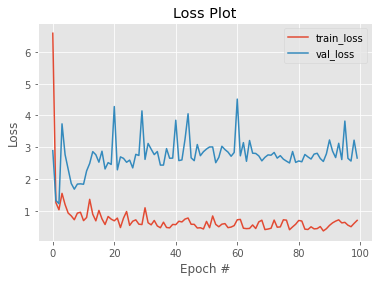

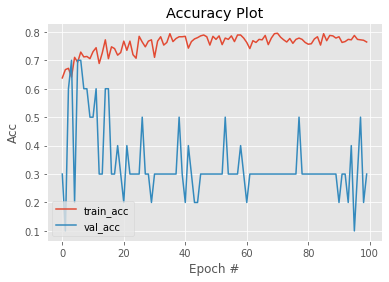

In [29]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.43      0.46         7

    accuracy                           0.30        10
   macro avg       0.25      0.21      0.23        10
weighted avg       0.35      0.30      0.32        10



In [31]:
from keras.models import save_model
model = save_model(model,'AnnMl.h5')